In [399]:
from HeaderP import *

In [484]:
import numpy as np
import matplotlib.pyplot as plt
def Randomwalk1D(n, timestep, D=0.5): #n here is the no. of steps that we require
    x = 0
    y = 0
    xposition = [0] #starting from origin (0,0)
    yposition = [0] 

    for i in range (1,n+1):
        step = np.random.uniform(0,1)

        if step < 0.5: # if step is less than 0.5 we move up    
            x += timestep
            y += 1*np.sqrt(timestep)*np.sqrt(2*D)  #moving up in u direction

        if step > 0.5: # if step is greater than 0.5 we move down  
            x += timestep
            y += -1*np.sqrt(timestep)*np.sqrt(2*D) #moving down in y direction

        xposition.append(x)
        yposition.append(y)
    return [xposition,yposition]


Text(0, 0.5, 'dR')

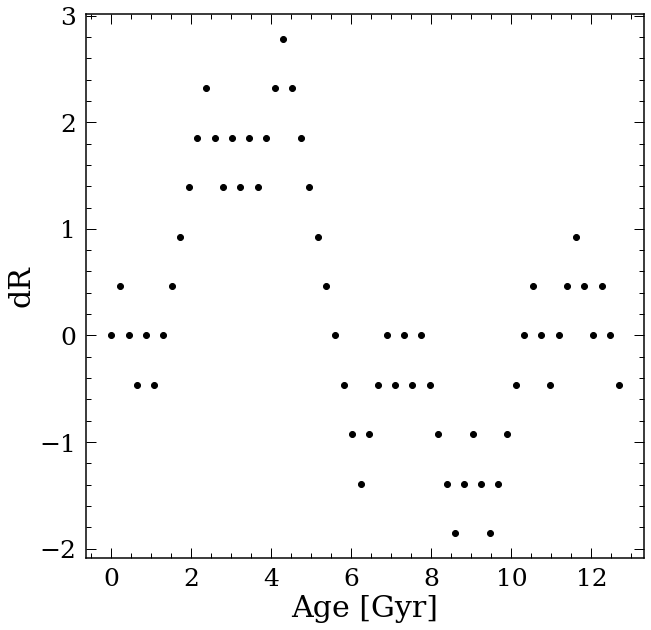

In [485]:
x, y = Randomwalk1D(59, 0.215)
plt.plot(x,y,'ko')
plt.xlabel('Age [Gyr]')
plt.ylabel('dR')

# Generate 1000 particles

In [486]:
def SlideMed(age, dr, window, slide):
    age, dr = np.array(age), np.array(dr)
    minage, maxage = min(age), max(age)
    npoints = int((maxage-minage)/slide)
    medage = np.zeros(npoints)*np.nan
    meddr = np.zeros(npoints)*np.nan
    for i in trange(npoints):
        if i==0:
            m_w = (age<window)
        elif i==npoints-1:
            m_w = (age>(maxage-window))
        else:
            m_w = ((age>(i*slide-window+minage))&(age<(i*slide+window+minage)))
        #print(sum(m_w))
        medage[i], meddr[i] = np.median(age[m_w]), np.median(dr[m_w])
    m_nan = (meddr==meddr)
    medage, meddr = medage[m_nan], meddr[m_nan]
    return medage, meddr
        

In [402]:
npart = 1000
ages, drs = np.zeros((npart,60)), np.zeros((npart,60))
for i in range(npart):
    ages[i,:], drs[i,:] = Randomwalk1D(59, 0.215)
    

In [403]:
age_flat, drs_flat = ages.ravel(), drs.ravel()
print(np.shape(age_flat))

(60000,)


  0%|          | 0/5073 [00:00<?, ?it/s]/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 5073/5073 [00:01<00:00, 3336.51it/s]


Text(0, 0.5, 'ΔR [kpc]')

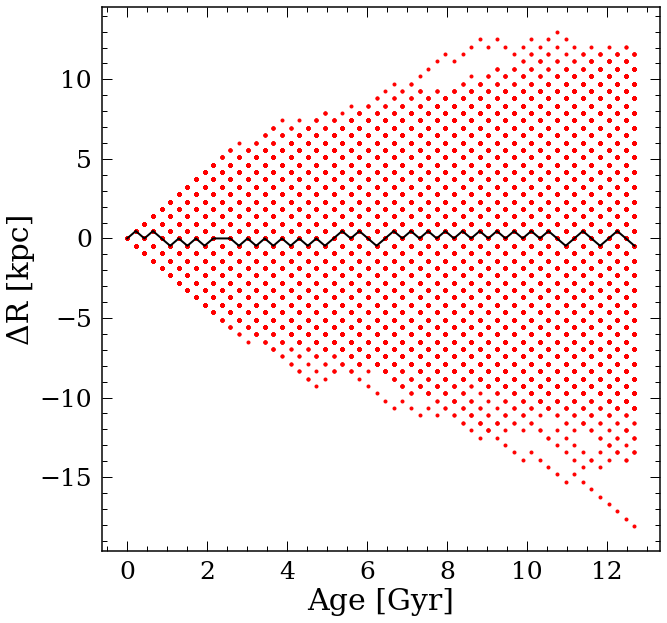

In [446]:
age_order, dr_order = zip(*sorted(zip(age_flat, drs_flat)))
age_smooth, dr_smooth = SlideMed(age_order, dr_order, 0.0025/2, 0.0025)

plt.plot(age_flat, drs_flat,'r.')
plt.plot(age_smooth, dr_smooth,'k-')
plt.xlabel('Age [Gyr]')
plt.ylabel('ΔR [kpc]')

<ipython-input-447-41fc6677e1fd>:16: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A/xf, 'r--',label='1/$f$ (pink noise)',linewidth=5)
<ipython-input-447-41fc6677e1fd>:17: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A*50/xf**2, 'b--',label='1/$f^2$ (Brown noise, random walk)',linewidth=5)


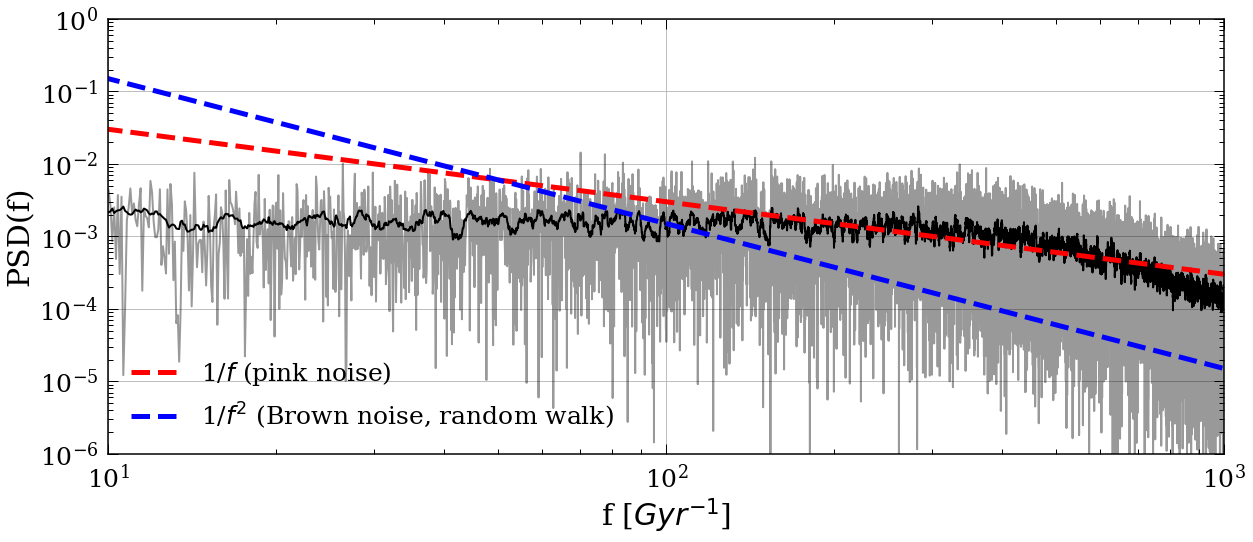

In [447]:
N = len(age_flat)
T = max(age_flat)/N
yf = fft(drs_flat)

xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(20,8))
PSD = 2.0/N * np.abs(yf[0:N//2])
plt.loglog(xf,PSD**2,'k-',alpha=0.4)

#PSD_smooth = gaussian_filter1d(PSD, 5)
PSD_smooth = savgol_filter(PSD**2, 21, 1)
plt.loglog(xf,PSD_smooth,'k-')

A = 0.3
plt.plot(xf, A/xf, 'r--',label='1/$f$ (pink noise)',linewidth=5)
plt.plot(xf, A*50/xf**2, 'b--',label='1/$f^2$ (Brown noise, random walk)',linewidth=5)
plt.grid()
plt.xlim([10,1e3])
plt.ylim([1e-6,1])
plt.xlabel('f [$Gyr^{-1}$]')
plt.ylabel('PSD(f)')
plt.legend(loc=3)

# Generate 10000 particles

In [448]:
npart = 10000
ages, drs = np.zeros((npart,60)), np.zeros((npart,60))
for i in range(npart):
    ages[i,:], drs[i,:] = Randomwalk1D(59, 0.215)
    

In [449]:
age_flat, drs_flat = ages.ravel(), drs.ravel()
print(np.shape(age_flat))

(600000,)


  0%|          | 0/5073 [00:00<?, ?it/s]/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 5073/5073 [00:01<00:00, 3141.68it/s]


Text(0, 0.5, 'ΔR [kpc]')

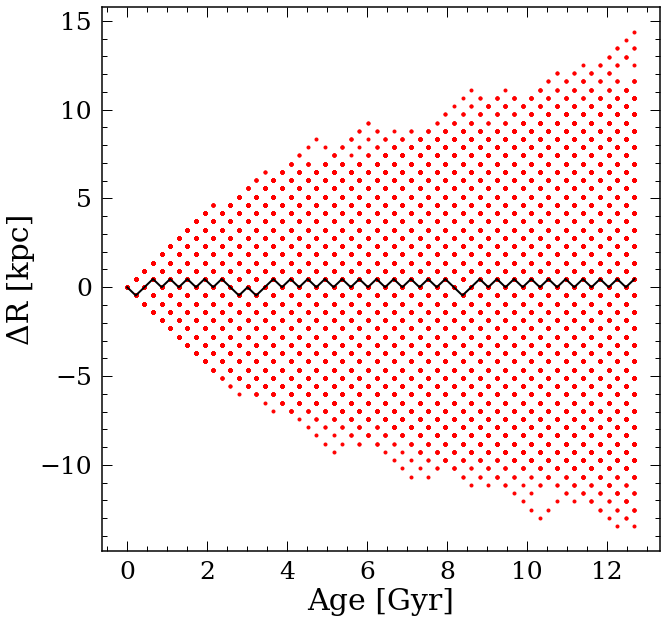

In [450]:
age_order, dr_order = zip(*sorted(zip(age_flat, drs_flat)))
age_smooth, dr_smooth = SlideMed(age_order, dr_order, 0.0025/2, 0.0025)

plt.plot(age_flat, drs_flat,'r.')
plt.plot(age_smooth, dr_smooth,'k-')
plt.xlabel('Age [Gyr]')
plt.ylabel('ΔR [kpc]')

<ipython-input-451-eaea3a9154cf>:17: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A1/xf, 'r--',label='1/$f$ (pink noise)',linewidth=5)
<ipython-input-451-eaea3a9154cf>:18: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A2/xf**2, 'b--',label='1/$f^2$ (Brown noise, random walk)',linewidth=5)


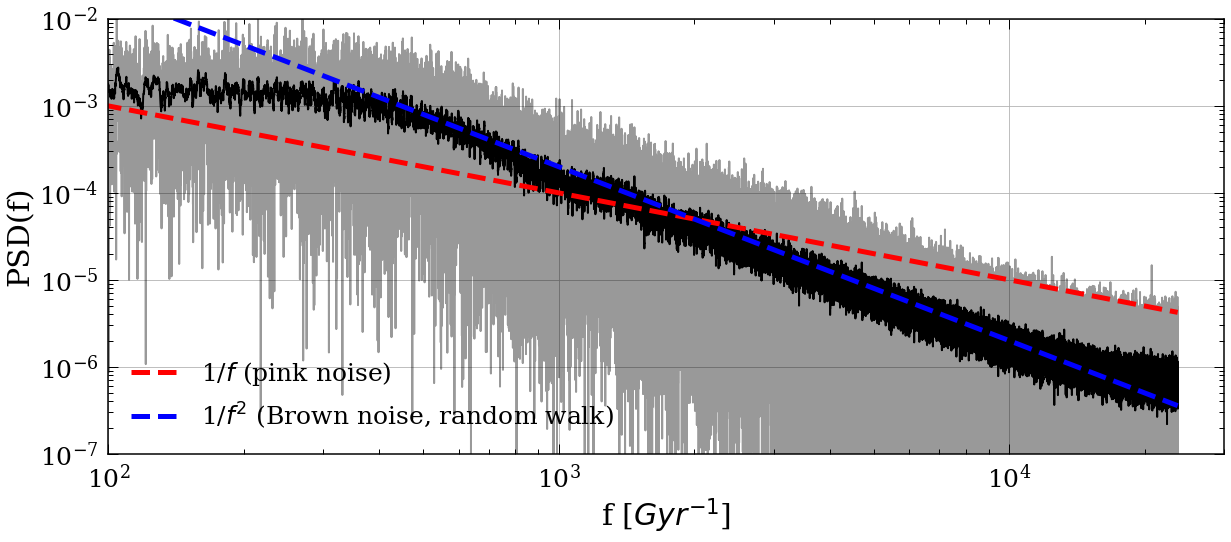

In [451]:
N = len(age_flat)
T = max(age_flat)/N
yf = fft(drs_flat)

xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(20,8))
PSD = 2.0/N * np.abs(yf[0:N//2])
plt.loglog(xf,PSD**2,'k-',alpha=0.4)

#PSD_smooth = gaussian_filter1d(PSD, 5)
PSD_smooth = savgol_filter(PSD**2, 21, 1)
plt.loglog(xf,PSD_smooth,'k-')

A1 = 0.1
A2 = 2e2
plt.plot(xf, A1/xf, 'r--',label='1/$f$ (pink noise)',linewidth=5)
plt.plot(xf, A2/xf**2, 'b--',label='1/$f^2$ (Brown noise, random walk)',linewidth=5)
plt.grid()
plt.xlim([100,3e4])
plt.ylim([1e-7,1e-2])
plt.xlabel('f [$Gyr^{-1}$]')
plt.ylabel('PSD(f)')
plt.legend(loc=3)

# sampling stars as Tobia's simulation

In [494]:
ages, drs = np.zeros(0), np.zeros(0)

stellage = []
dR = []
D = 1

xfs = np.zeros(0)
PSDs = np.zeros(0)
pn = np.zeros(59)
for i in trange(59):
    for j in range(200):
        agenew, drnew = Randomwalk1D(59-i, 0.215, D=D)
        ages = np.append(ages, np.array(agenew)+i*0.215)
        drs = np.append(drs, np.array(drnew))
        
        # do fft
        N = len(agenew)
        T = max(agenew)/N
        yf = fft(drnew)
        xfs = np.append(xfs,fftfreq(N, T)[:N//2])
        FFTp = 2.0/N * np.abs(yf[0:N//2])
        PSDs = np.append(PSDs, FFTp**2)
        pn[i] = len(agenew)
    
        stellage.append((59-i)*0.215)
        dR.append(drs[-1])

100%|██████████| 59/59 [00:29<00:00,  2.00it/s]


  0%|          | 0/228 [00:00<?, ?it/s]/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 228/228 [00:00<00:00, 2189.95it/s]
<ipython-input-503-0a1a6f3f3f14>:11: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xfs_smooth, A2*0.215**2/xfs_smooth**2, 'b--',label='$DΔ^2/f^2$ (Brown noise, random walk)',linewidth=5)


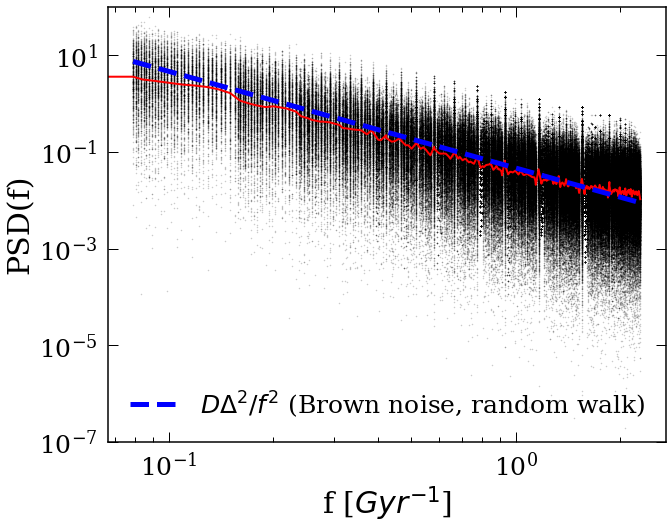

In [503]:
# do every star
plt.figure(figsize=(10,8))
plt.loglog(np.array(xfs), np.array(PSDs), 'k.', markersize=1, alpha=0.2)
xfs_smooth, PSDs_smooth = SlideMed(xfs, PSDs, 0.01, 0.01)
plt.loglog(xfs_smooth, PSDs_smooth, 'r-')
plt.ylim([1e-7,1e2])
plt.xlabel('f [$Gyr^{-1}$]')
plt.ylabel('PSD(f)')

A2 = 1
plt.plot(xfs_smooth, A2*0.215**2/xfs_smooth**2, 'b--',label='$DΔ^2/f^2$ (Brown noise, random walk)',linewidth=5)
plt.legend()


# just some exploration on Ergodicity

  0%|          | 0/4988 [00:00<?, ?it/s]/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 4988/4988 [00:00<00:00, 19372.51it/s]


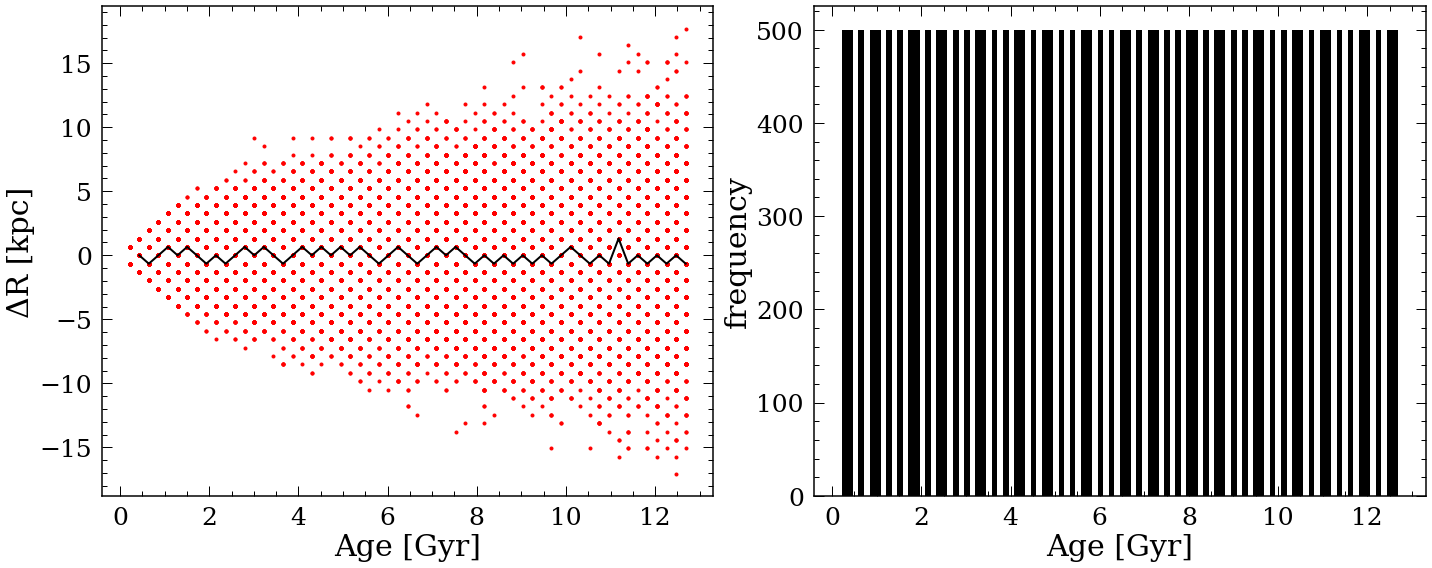

In [504]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(stellage, dR, 'r.');
age_smooth, dr_smooth = SlideMed(stellage, dR, 0.0025/2, 0.0025)
plt.plot(age_smooth, dr_smooth, 'k-')
plt.xlabel('Age [Gyr]')
plt.ylabel('ΔR [kpc]')

plt.subplot(1,2,2)
plt.hist(stellage, bins=100, color='k');
plt.xlabel('Age [Gyr]')
plt.ylabel('frequency')
plt.tight_layout()

In [505]:
stellage, dR = zip(*sorted(zip(stellage, dR)))

100%|██████████| 58/58 [00:00<00:00, 12786.17it/s]
<ipython-input-506-90f1ffdb8796>:16: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A1/xf, 'r--',label='1/$f$ (pink noise)',linewidth=5)
<ipython-input-506-90f1ffdb8796>:17: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A2_2/xf**2, 'b--',label='1/$f^2$ (Brown noise, random walk)',linewidth=5)


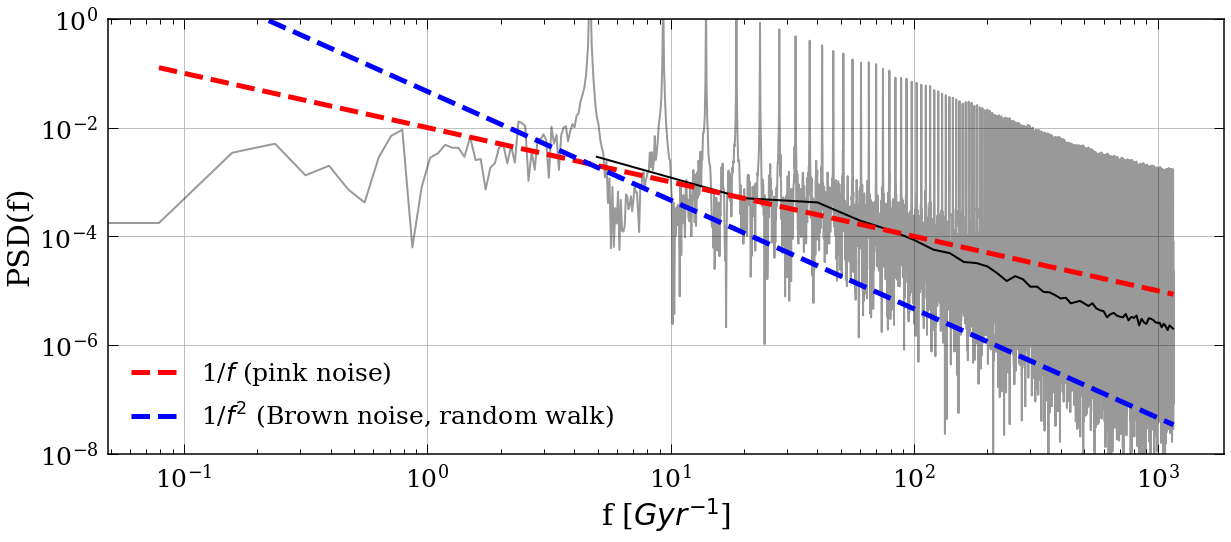

In [506]:
N = len(stellage)
T = max(stellage)/N
yf = fft(dR)

xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(20,8))
PSD = 2.0/N * np.abs(yf[0:N//2])
plt.loglog(xf,PSD**2,'k-',alpha=0.4)

xfs_smooth, PSDs_smooth = SlideMed(xf, PSD**2, 10, 20)
plt.loglog(xfs_smooth, PSDs_smooth,'k-')

A1 = 0.01
A2_2 = A2*0.215**2
plt.plot(xf, A1/xf, 'r--',label='1/$f$ (pink noise)',linewidth=5)
plt.plot(xf, A2_2/xf**2, 'b--',label='1/$f^2$ (Brown noise, random walk)',linewidth=5)
plt.grid()
#plt.xlim([100,3e4])
plt.ylim([1e-8,1])
plt.xlabel('f [$Gyr^{-1}$]')
plt.ylabel('PSD(f)')
plt.legend(loc=3)